# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px

import scipy
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

# Import the Dataset

In [2]:
df_test = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/CREDIT CARD TRANSACTIONS FRAUD DETECTION/Fraud Detection Dataset/fraudTest.csv')

In [3]:
df_train = pd.read_csv('C:/Users/sanso/Desktop/CODSOFT/CREDIT CARD TRANSACTIONS FRAUD DETECTION/Fraud Detection Dataset/fraudTrain.csv')

In [4]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
len(df_test)

555719

In [6]:
len(df_train)

1296675

In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,555719.0,2.778590e+05,1.604224e+05,0.000000e+00,1.389295e+05,2.778590e+05,4.167885e+05,5.557180e+05
cc_num,555719.0,4.178387e+17,1.309837e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.635331e+15,4.992346e+18
amt,555719.0,6.939281e+01,1.567459e+02,1.000000e+00,9.630000e+00,4.729000e+01,8.301000e+01,2.276811e+04
zip,555719.0,4.884263e+04,2.685528e+04,1.257000e+03,2.629200e+04,4.817400e+04,7.201100e+04,9.992100e+04
lat,555719.0,3.854325e+01,5.061336e+00,2.002710e+01,3.466890e+01,3.937160e+01,4.189480e+01,6.568990e+01
long,555719.0,-9.023133e+01,1.372178e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.017520e+01,-6.795030e+01
city_pop,555719.0,8.822189e+04,3.003909e+05,2.300000e+01,7.410000e+02,2.408000e+03,1.968500e+04,2.906700e+06
unix_time,555719.0,1.380679e+09,5.201104e+06,1.371817e+09,1.376029e+09,1.380762e+09,1.385867e+09,1.388534e+09
merch_lat,555719.0,3.854280e+01,5.095829e+00,1.902742e+01,3.475530e+01,3.937659e+01,4.195416e+01,6.667930e+01
merch_long,555719.0,-9.023138e+01,1.373307e+01,-1.666716e+02,-9.690513e+01,-8.744520e+01,-8.026464e+01,-6.695203e+01


In [8]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [9]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [10]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
df_test.shape

(555719, 23)

In [12]:
df_train.shape

(1296675, 23)

In [13]:
print("="*50)
print("First Five Rows", "\n")
print(df_test.head(5), "\n")

print("="*50)
print("Information About Dataset", "\n")
print(df_test.info(), "\n")

print("="*50)
print("Describe the Dataset", "\n")
print(df_test.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df_test.isnull().sum(), "\n")

First Five Rows 

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Un

In [14]:
print("="*50)
print("First Five Rows", "\n")
print(df_train.head(5), "\n")

print("="*50)
print("Information About Dataset", "\n")
print(df_train.info(), "\n")

print("="*50)
print("Describe the Dataset", "\n")
print(df_train.describe(), "\n")

print("="*50)
print("Null Values", "\n")
print(df_train.isnull().sum(), "\n")

First Five Rows 

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens 

<Axes: >

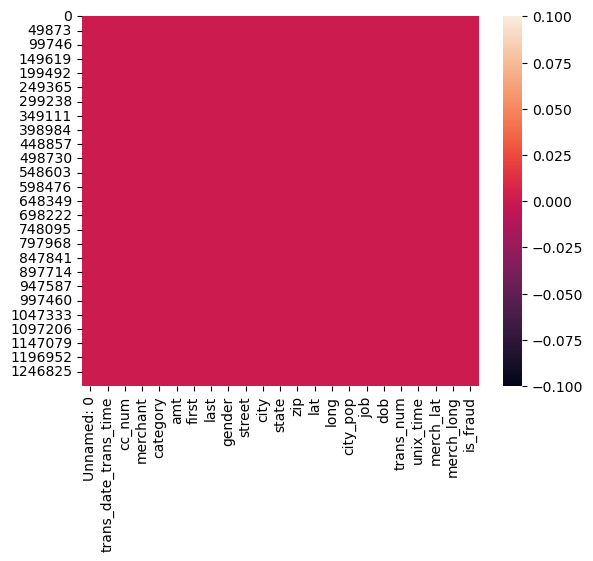

In [15]:
sns.heatmap(df_train.isnull())

<Axes: >

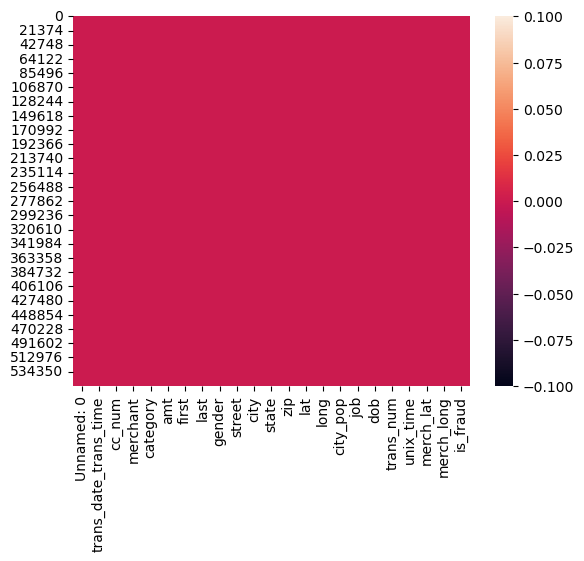

In [16]:
sns.heatmap(df_test.isnull())

# Cleaning those columns which are not required!

In [17]:
df_test.drop(columns=['Unnamed: 0','street','state','first','last','trans_num'],inplace=True)

In [18]:
df_test.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,Titusville,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,Falmouth,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   gender                 555719 non-null  object 
 6   city                   555719 non-null  object 
 7   zip                    555719 non-null  int64  
 8   lat                    555719 non-null  float64
 9   long                   555719 non-null  float64
 10  city_pop               555719 non-null  int64  
 11  job                    555719 non-null  object 
 12  dob                    555719 non-null  object 
 13  unix_time              555719 non-null  int64  
 14  merch_lat              555719 non-nu

# Change the data type for "trans_date_trans_time" to datetime

# Removing the "fraud_" from each and every merchant name

In [20]:
df_test['merchant'] = df_test['merchant'].apply(lambda x : x.replace('fraud_',''))

df_test[['merchant']].head()

,merchant
0,Kirlin and Sons
1,Sporer-Keebler
2,"Swaniawski, Nitzsche and Welch"
3,Haley Group
4,Johnston-Casper


In [21]:
df_test['merchant'].head()

0                   Kirlin and Sons
1                    Sporer-Keebler
2    Swaniawski, Nitzsche and Welch
3                       Haley Group
4                   Johnston-Casper
Name: merchant, dtype: object

In [22]:
df_test.drop(columns=['dob','cc_num','city','zip'],inplace=True)

df_test.head()

,trans_date_trans_time,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


# Distance between customer's home and merchant

In [23]:
# df_test['lat_dist'] = abs(round(df_test['merch_lat'] - df_test['lat'],2))
# df_test['long_dist'] = abs(round(df_test['merch_long'] - df_test['long'],2))

In [24]:
# df_test.drop(columns=['lat','long','merch_lat','merch_long','trans_date_trans_time'],inplace=True)
df_test.drop(columns=['trans_date_trans_time'],inplace=True)
df_test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0


In [25]:
df_test.describe(include='object')

,merchant,category,gender,job
count,555719,555719,555719,555719
unique,693,14,2,478
top,Kilback LLC,gas_transport,F,Film/video editor
freq,1859,56370,304886,4119


# Fraud By Gender

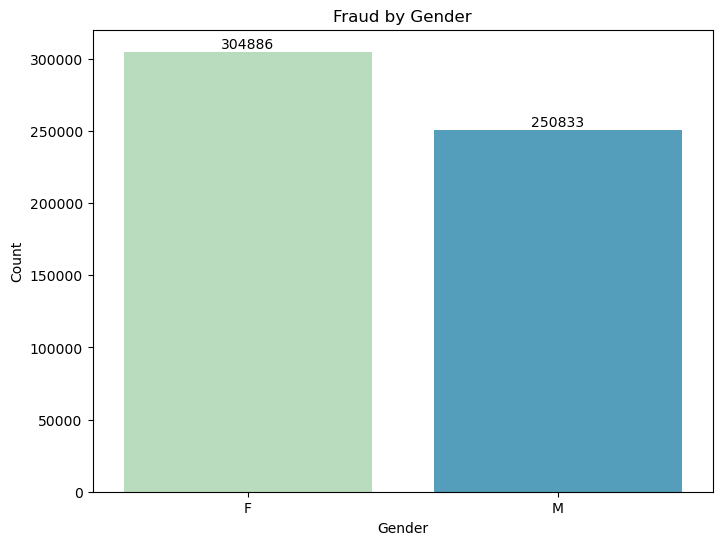

In [26]:
fraud_by_gender = df_test.gender.value_counts().to_frame().reset_index()

fraud_by_gender.columns = ['Gender', 'Count']

plt.figure(figsize = (8,6))

plt.title('Fraud by Gender')

ax = sns.barplot(x = fraud_by_gender['Gender'], y = fraud_by_gender['Count'], palette='GnBu')

for i in ax.containers:
    ax.bar_label(i,)

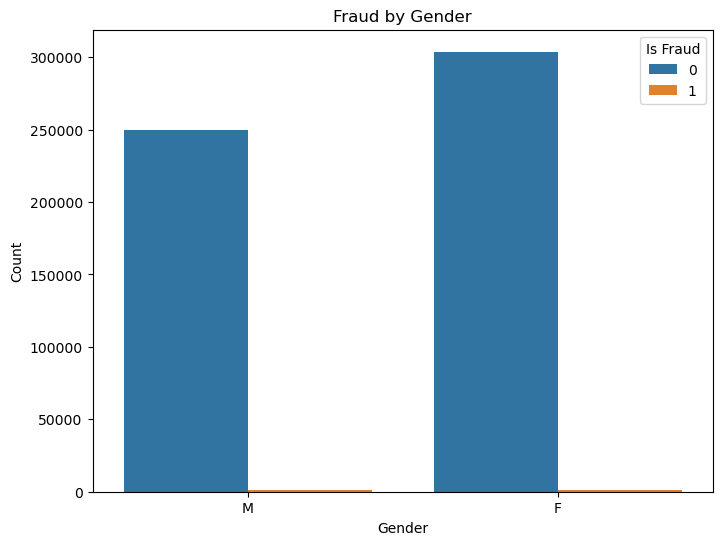

In [27]:
plt.figure(figsize = (8,6))

df_test['gender'] = df_test['gender'].astype(str)
df_test['is_fraud'] = df_test['is_fraud'].astype(str)

sns.countplot(x = 'gender', hue ='is_fraud', data = df_test)

plt.title('Fraud by Gender')

plt.xlabel('Gender')
plt.ylabel('Count')

plt.legend(title = 'Is Fraud')

plt.show()

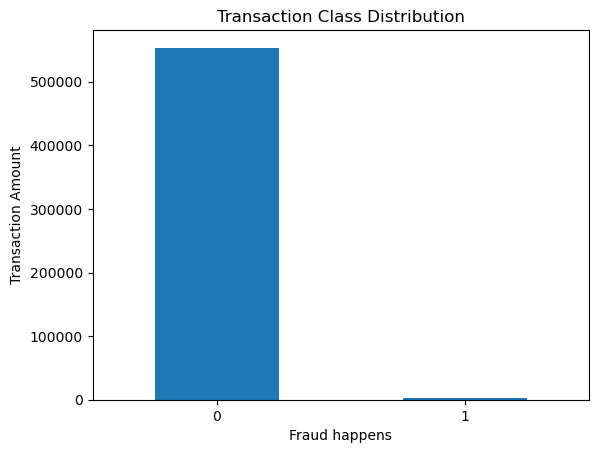

In [28]:
count_classes = pd.value_counts(df_test['is_fraud'], sort = True)

count_classes.plot(kind = 'bar', rot = 0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Fraud happens") # 0 means no fraud, 1 means fraud

plt.ylabel("Transaction Amount")

plt.show()

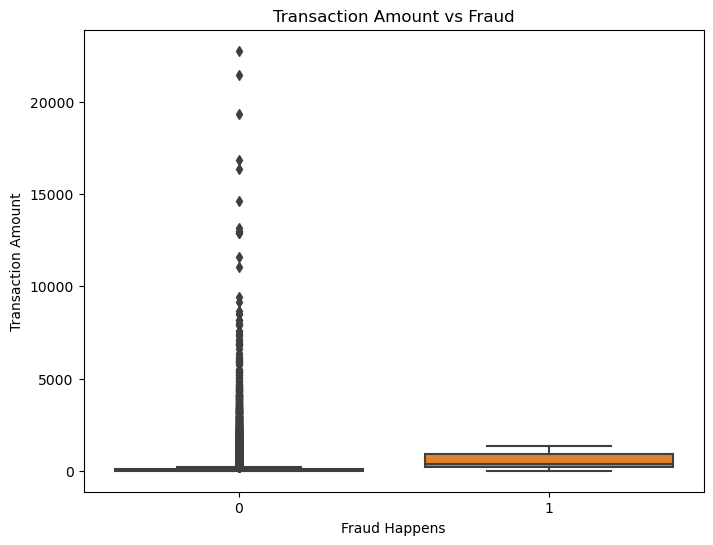

In [29]:
plt.figure(figsize=(8,6))

sns.boxplot(x = 'is_fraud' , y = 'amt' , data = df_test)

plt.title("Transaction Amount vs Fraud")

plt.xlabel("Fraud Happens")
plt.ylabel("Transaction Amount")

plt.show()

# Data Cleaning for Train dataset

In [30]:
def cleaning_data(clean):
    clean.drop(["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],axis=1, inplace=True)
    clean.dropna()
    return clean

In [31]:
cleaning_data(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [32]:
df_train.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0


In [33]:
df_train['gender'] = df_train['gender'].map({'M': 0, 'F': 1})

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 118.7+ MB


# Encoding the dataset

In [35]:
encoder = LabelEncoder()
def encode(data):
    data["merchant"] = encoder.fit_transform(data["merchant"])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [36]:
encode(df_train)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,1,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,1,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,0,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,0,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,0,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,0,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,0,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,0,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,0,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [37]:
encode(df_test)

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


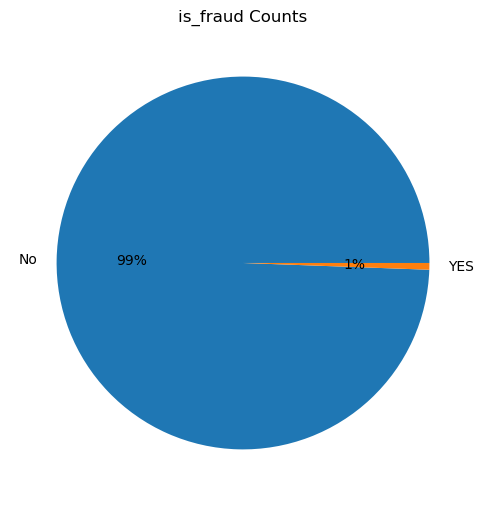

In [38]:
counts = df_train["is_fraud"].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(counts, labels=["No", "YES"], autopct="%0.0f%%")

plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [39]:
df_train.corr()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
merchant,1.000000,0.032302,-0.002633,0.000915,-0.002266,-0.000697,0.001911,0.001360,-0.000999,-0.002263,-0.000673,-0.000536
category,0.032302,1.000000,0.030867,0.028259,-0.008660,-0.000767,0.009386,0.003490,0.000182,-0.008519,-0.000736,0.020205
amt,-0.002633,0.030867,1.000000,-0.001034,-0.001926,-0.000187,0.005818,-0.000628,-0.000293,-0.001873,-0.000151,0.219404
gender,0.000915,0.028259,-0.001034,1.000000,-0.042935,-0.050404,0.028649,0.079908,0.000960,-0.042645,-0.050350,-0.007642
lat,-0.002266,-0.008660,-0.001926,-0.042935,1.000000,-0.015533,-0.155730,-0.027593,0.000632,0.993592,-0.015509,0.001894
long,-0.000697,-0.000767,-0.000187,-0.050404,-0.015533,1.000000,-0.052715,-0.002729,-0.000642,-0.015452,0.999120,0.001721
city_pop,0.001911,0.009386,0.005818,0.028649,-0.155730,-0.052715,1.000000,-0.054945,-0.001714,-0.154781,-0.052687,0.002136
job,0.001360,0.003490,-0.000628,0.079908,-0.027593,-0.002729,-0.054945,1.000000,0.000032,-0.027412,-0.002727,-0.000093
unix_time,-0.000999,0.000182,-0.000293,0.000960,0.000632,-0.000642,-0.001714,0.000032,1.000000,0.000561,-0.000635,-0.005078
merch_lat,-0.002263,-0.008519,-0.001873,-0.042645,0.993592,-0.015452,-0.154781,-0.027412,0.000561,1.000000,-0.015431,0.001741


<Axes: >

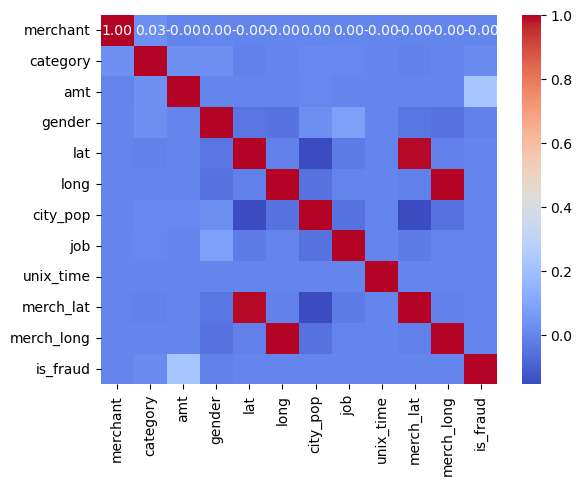

In [40]:
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm', fmt=".2f")

<Axes: >

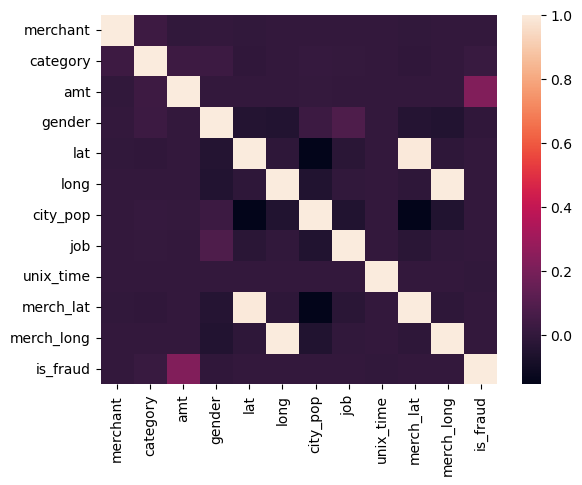

In [41]:
sns.heatmap(df_train.corr())

# MODEL MAKING

In [42]:
x = df_train.drop(columns=["is_fraud"], inplace = False)
y = df_train["is_fraud"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape

(1037340, 11)

In [45]:
y_train.shape

(1037340,)

In [46]:
x_test.shape

(259335, 11)

In [47]:
y_test.shape

(259335,)

In [48]:
x_test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
1045211,629,9,194.51,0,40.6153,-79.4545,972,378,1362841766,40.420453,-78.865012
547406,180,5,52.32,1,42.8250,-124.4409,217,400,1345650541,42.758860,-123.636337
110142,429,12,6.53,1,39.9636,-79.7853,184,444,1330824856,40.475159,-78.898190
1285953,187,6,7.33,0,42.9580,-77.3083,10717,115,1371413078,43.767506,-76.542384
271705,92,2,64.29,1,41.6423,-104.1974,635,358,1336974888,41.040392,-104.092324


In [49]:
y_test.head()

1045211    0
547406     0
110142     0
1285953    0
271705     0
Name: is_fraud, dtype: int64

# MODELS 

In [50]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [51]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'DecisionTreeClassifier']
accuracies=[]

In [52]:
def call(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    accuracies.append(accuracy)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(model)
    print()
    print("Accuracy of the Model: ")
    print(accuracy)

In [53]:
call(model1)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression()

Accuracy of the Model: 
0.9941388551487458


In [54]:
call(model2)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier()

Accuracy of the Model: 
0.9974087570131297


In [55]:
call(model3)

________MODEL EVALUATION ON TEST DATA________
Model: 
DecisionTreeClassifier()

Accuracy of the Model: 
0.9959087666531706


# ACCURACY OF THE MODELS

In [56]:
accuracies

[0.9941388551487458, 0.9974087570131297, 0.9959087666531706]

In [57]:
FinalResult = pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

In [58]:
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.994139
1,RandomForestClassifier,0.997409
2,DecisionTreeClassifier,0.995909


# PLOT GRAPH ON THE ACCURACY OF THE MODELS

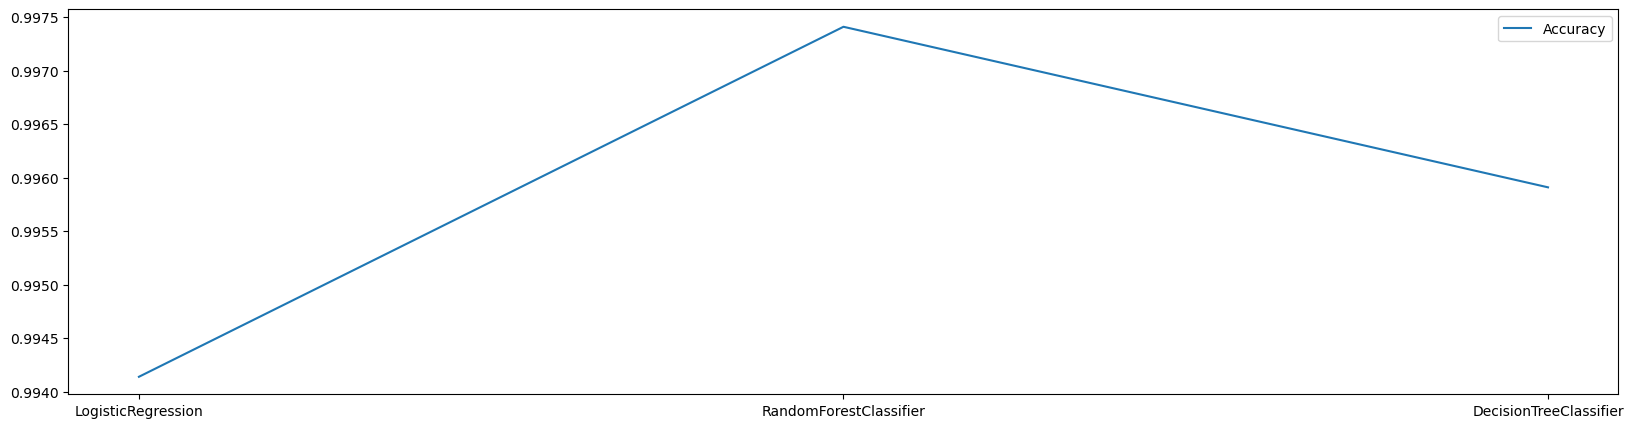

In [59]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [60]:
x_test = df_test.drop(columns=["is_fraud"], inplace = False)
y_test = df_test["is_fraud"]

In [61]:
x_test.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734


# CLASSIFICATION REPORT OF LogisticRegression() MODEL

In [62]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
df_test['is_fraud'] = df_test['is_fraud'].astype(int)

accuracy1 = accuracy_score(df_test['is_fraud'],y_pred1)
print(accuracy1)

0.9961401355721147


In [64]:
report1 = classification_report(df_test['is_fraud'], y_pred1)

print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



# CLASSIFICATION REPORT OF RandomForestClassifier() MODEL

In [65]:
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
df_test['is_fraud'] = df_test['is_fraud'].astype(int)

accuracy2 = accuracy_score(df_test['is_fraud'],y_pred2)
print(accuracy2)

0.997509532695481


In [67]:
report2 = classification_report(df_test['is_fraud'], y_pred2)

print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.57      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.79      0.82    555719
weighted avg       1.00      1.00      1.00    555719



# CLASSIFICATION REPORT OF DecisionTreeClassifier() MODEL

In [68]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [69]:
df_test['is_fraud'] = df_test['is_fraud'].astype(int)

accuracy3 = accuracy_score(df_test['is_fraud'],y_pred3)
print(accuracy3)

0.9898923736636681


In [70]:
report3 = classification_report(df_test['is_fraud'], y_pred3)

print(report3)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.21      0.58      0.31      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.78      0.65    555719
weighted avg       1.00      0.99      0.99    555719



# REPORTS OF THE MODELS

In [71]:
print("Report1 presenting 'LogisticRegression' model: ")
print(report1)
print("\n")
print("Report2 presenting 'RandomForestClassifier' model: ")
print(report2)
print("\n")
print("Report3 presenting 'DecisionTreeClassifier' model: ")
print(report3)
print("\n")

Report1 presenting 'LogisticRegression' model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



Report2 presenting 'RandomForestClassifier' model: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.72      0.57      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.86      0.79      0.82    555719
weighted avg       1.00      1.00      1.00    555719



Report3 presenting 'DecisionTreeClassifier' model: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.21      0.58      0.31      2145

    accuracy              

## Plotting Graph on Each Model Prediction 

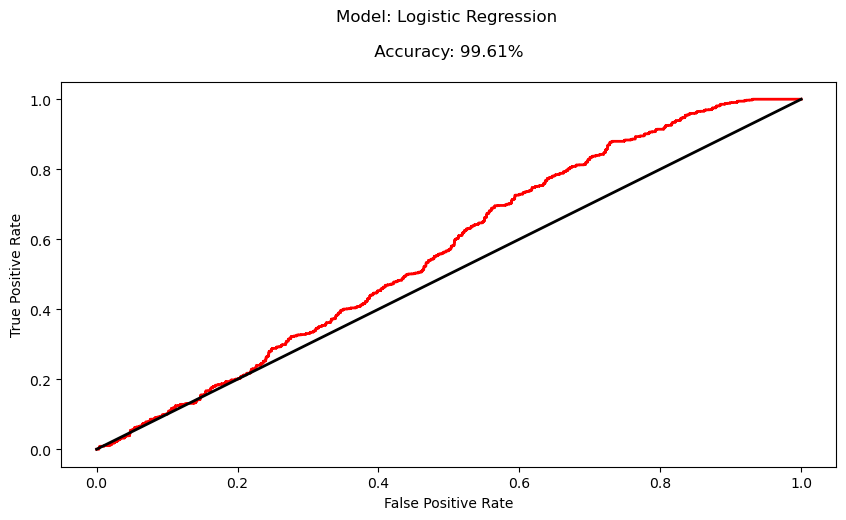

In [72]:
y_prob1 = model1.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(df_test['is_fraud'], y_prob1)

plt.figure(figsize=(10, 5))

plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Model: Logistic Regression \n\n Accuracy: {:.2f}% \n'.format(accuracy1 * 100))

plt.show()

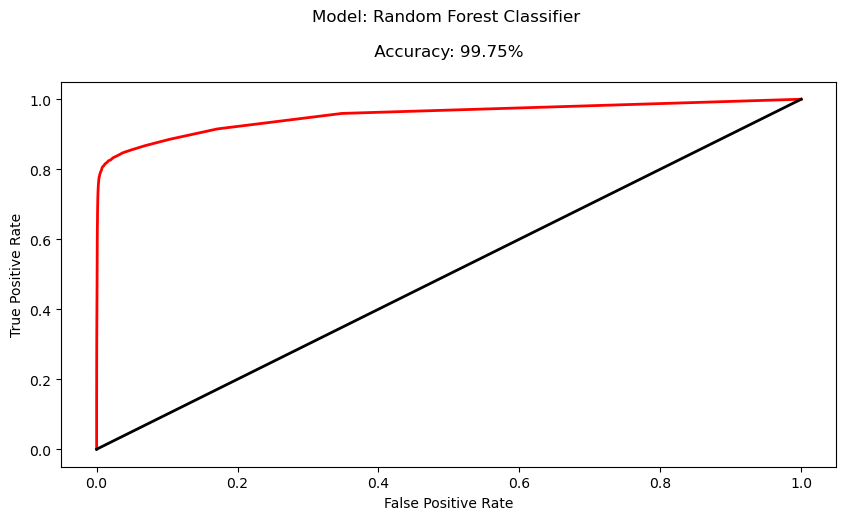

In [73]:
y_prob2 = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(df_test['is_fraud'], y_prob2)

plt.figure(figsize=(10, 5))

plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Model: Random Forest Classifier \n\n Accuracy: {:.2f}% \n'.format(accuracy2 * 100))

plt.show()

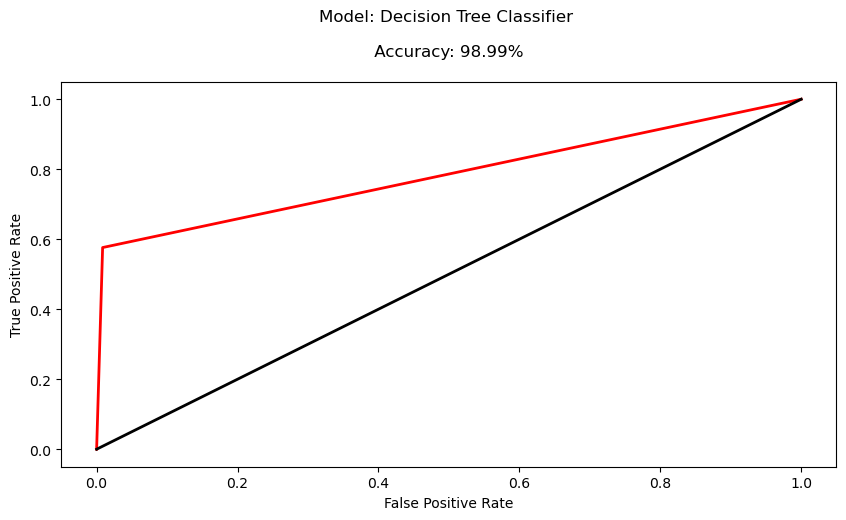

In [74]:
y_prob3 = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(df_test['is_fraud'], y_prob3)

plt.figure(figsize=(10, 5))

plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Model: Decision Tree Classifier \n\n Accuracy: {:.2f}% \n'.format(accuracy3 * 100))

plt.show()

## Bar plot of accuracies of the models

Text(0.5, 1.0, 'Model vs Accuracy_score')

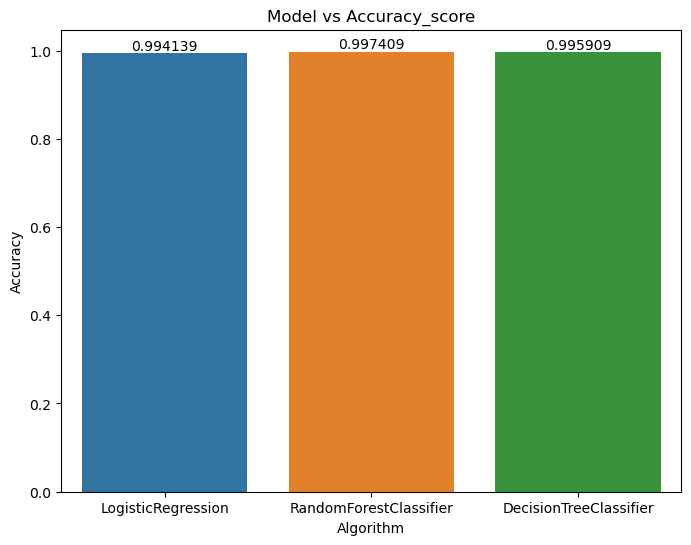

In [75]:
#Barplot of accuracies

plt.figure(figsize = (8, 6))

ax = sns.barplot(x = "Algorithm", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')